## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

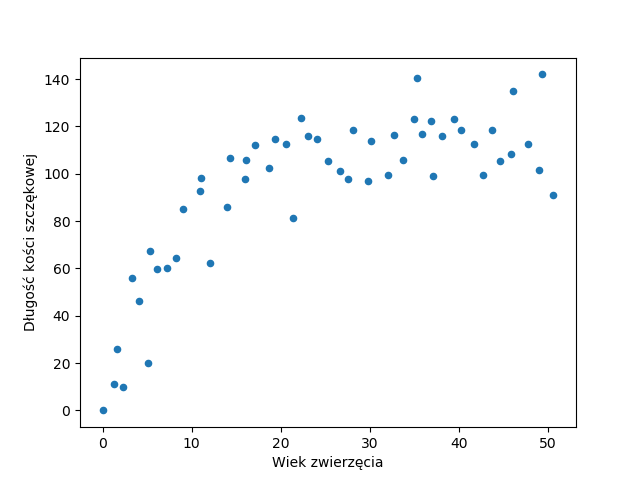

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [1]:
import numpy as np

'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(X: np.ndarray, n: int) -> np.ndarray:
    out = []
    # YOUR CODE HEREfor x in abc:
    for x in X:
        z = []
        for y in x:
            a = []
            for i in range(1,n + 1):
                a.append(y**i)
            z = z + a
        out.append(z)
    return out

### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#YOUR CODE HERE

df = pd.read_csv('../datasets/jaws.csv', sep=',')

In [3]:
df['age'].head(5)

0     0.000000
1     5.112000
2     1.320000
3    35.240000
4     1.632931
Name: age, dtype: float64

In [4]:
# YOUR CODE HERE
import random
from typing import Tuple, List

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    #YOUR CODE HERE
    return (random.random() if alpha == None else alpha,np.array([random.random() for x in range(n + 1)]))

def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    #YOUR CODE HERE
    return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])

def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    #YOUR CODE HERE
    return np.sum((calculate_regression_function(X,betas) - y)**2)/(2*len(y))

def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    #YOUR CODE HERE
    return np.append(np.array(np.sum(calculate_regression_function(X,betas) - y)/len(y)), 
                     np.array([np.sum([np.array(calculate_regression_function(X,betas) - y)*x[i] for x in X])/len(y) for i in range(len(betas[1:]))]))

def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    #YOUR CODE HERE
    return np.array(betas-calculate_gradient(X,y,betas)*alpha)

In [5]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
import sklearn.preprocessing as skl

def learn_and_fit(X: np.ndarray, y: np.ndarray, epochs: int = 1000, alpha: float = 0.00005, polynomial_features: int = 0, normalize: str = 'none') -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    #YOUR CODE HERE
    X = [[age] for age in X]
    if normalize != 'none':
        skl.normalize(X=X, norm=normalize)
    if polynomial_features != 0:
        X = transform_to_polynomial_feature(X,polynomial_features)
    betas = [[]]
    _, betas[0] = initialize_coefficients(len(X[0]), alpha=0.00005)
    error = []
    for i in range (epochs):
        error.append(calculate_error(X,y,np.array(betas[-1])))
        betas.append(update_regression_coefficients(X,y,np.array(betas[-1]),alpha))
    return ([beta[0] for beta in betas], [beta[1:] for beta in betas], error)


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:15: RuntimeWarning: overflow encountered in square
  return np.sum((calculate_regression_function(X,betas) - y)**2)/(2*len(y))
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:11: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: invalid value encountered in multiply
  np.array([np.sum([np.array(calculate_regression_function(X,betas) - y)*x[i] for x in X])/len(y) for i in range(len(betas[1:]))]))
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: overflow encountered in multiply
  np.array([np.s

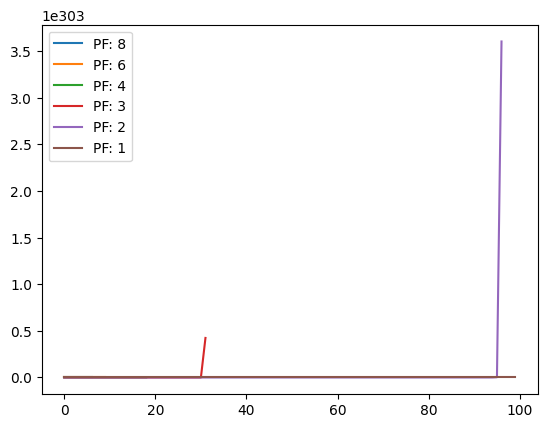

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:15: RuntimeWarning: overflow encountered in square
  return np.sum((calculate_regression_function(X,betas) - y)**2)/(2*len(y))
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: overflow encountered in multiply
  np.array([np.sum([np.array(calculate_regression_function(X,betas) - y)*x[i] for x in X])/len(y) for i in range(len(betas[1:]))]))
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: invalid value encountered in multiply
  np.array(

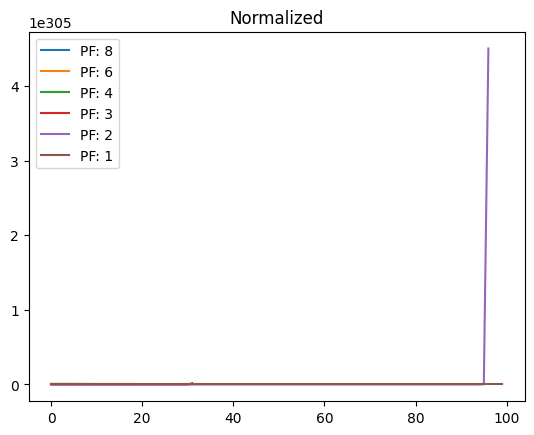

In [6]:
epochs=100
alpha = 0.000001
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=8)
plt.plot(range(epochs),error,label='PF: 8')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=6)
plt.plot(range(epochs),error,label='PF: 6')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=4)
plt.plot(range(epochs),error,label='PF: 4')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=3)
plt.plot(range(epochs),error,label='PF: 3')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=2)
plt.plot(range(epochs),error,label='PF: 2')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=1)
plt.plot(range(epochs),error,label='PF: 1')

plt.legend()
plt.show()

beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=8, normalize='l2')
plt.plot(range(epochs),error,label='PF: 8')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=6, normalize='l2')
plt.plot(range(epochs),error,label='PF: 6')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=4, normalize='l2')
plt.plot(range(epochs),error,label='PF: 4')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=3, normalize='l2')
plt.plot(range(epochs),error,label='PF: 3')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=2, normalize='l2')
plt.plot(range(epochs),error,label='PF: 2')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=1, normalize='l2')
plt.plot(range(epochs),error,label='PF: 1')

plt.title('Normalized')
plt.legend()
plt.show()

### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [7]:
# YOUR CODE HERE
import time
from sklearn.linear_model import LinearRegression

epochs=100
# YOUR CODE HERE
begin_time = time.time()
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=5, normalize='l2')
end_time = time.time()

print(f'Mój algorytm z normalizacją: {end_time - begin_time}')

begin_time = time.time()
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=5)
end_time = time.time()

print(f'Mój algorytm bez normalizacji: {end_time - begin_time}')

d = skl.normalize([[age] for age in np.array(df['age'])], norm='l2')
begin_time = time.time()
beta0, betas, error = learn_and_fit(d,np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=5)
end_time = time.time()

print(f'Mój algorytm z normalizacją zewnętrzną: {end_time - begin_time}')



C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:15: RuntimeWarning: overflow encountered in square
  return np.sum((calculate_regression_function(X,betas) - y)**2)/(2*len(y))
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: overflow encountered in multiply
  np.array([np.sum([np.array(calculate_regression_function(X,betas) - y)*x[i] for x in X])/len(y) for i in range(len(betas[1:]))]))
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: invalid value encountered in multiply
  np.array(

Mój algorytm z normalizacją: 8.48298168182373
Mój algorytm bez normalizacji: 8.445517778396606
Mój algorytm z normalizacją zewnętrzną: 20.493154764175415


### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:15: RuntimeWarning: overflow encountered in square
  return np.sum((calculate_regression_function(X,betas) - y)**2)/(2*len(y))
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: overflow encountered in multiply
  np.array([np.sum([np.array(calculate_regression_function(X,betas) - y)*x[i] for x in X])/len(y) for i in range(len(betas[1:]))]))
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4908\937048337.py:20: RuntimeWarning: invalid value encountered in multiply
  np.array(

[nan nan nan nan nan]


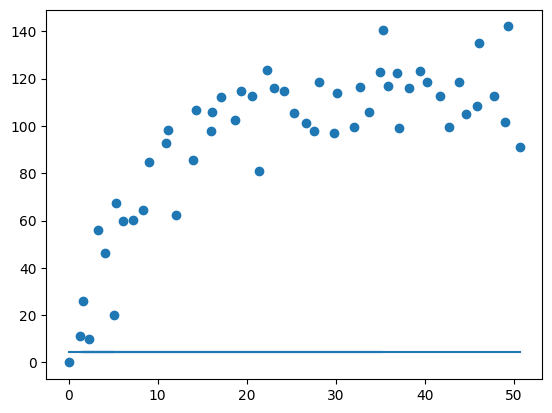

In [8]:
# YOUR CODE HERE
epochs=100
plt.scatter(df['age'],df['bone'])
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=1)
plt.plot(df['age'],calculate_regression_function(transform_to_polynomial_feature([[age] for age in np.array(df['age'])],1), beta0[-1] + betas[-1]),label='PF: 1')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=5)
print(betas[-1])
plt.plot(df['age'],calculate_regression_function(transform_to_polynomial_feature([[age] for age in np.array(df['age'])],5), beta0[-1] + betas[-1]),label='PF: 5')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=10)
plt.plot(df['age'],calculate_regression_function(transform_to_polynomial_feature([[age] for age in np.array(df['age'])],10), beta0[-1] + betas[-1]),label='PF: 10')


### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

In [9]:
# YOUR CODE HERE

### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [10]:
#YOUR CODE HERE